In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle

In [2]:
def GetRates(Name,cut1,cut2,net1,net2,sign1,sign2):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2)
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] >= cut2)
    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2)
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] <= cut2)
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2)
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] >= cut2)
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2)
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] <= cut2)
       

    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_c = np.sum(data_c['weight_val'][mask_c])
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_c_err = np.sqrt(np.sum(np.square(data_c['weight_val'][mask_c])))
    print("corsika events ", data_c['weight_val'][mask_c].shape)
    print(Name)
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("Corsika =   {0:.3f} +/- {1:.3f}".format(rate_c,rate_c_err))

def GetRatesM(Name,cut1,cut2,net1,net2,sign1,sign2,mask_t0,mask_c0):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2) & mask_t0
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] >= cut2) & mask_c0
    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2) & mask_t0
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] <= cut2) & mask_c0
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2) & mask_t0
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] >= cut2) & mask_c0 
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2) & mask_t0
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] <= cut2) & mask_c0 
       

    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_c = np.sum(data_c['weight_val'][mask_c])
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_c_err = np.sqrt(np.sum(np.square(data_c['weight_val'][mask_c])))
    print("corsika events ",data_c['weight_val'][mask_c].shape)
    print(Name)
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("Corsika =   {0:.3f} +/- {1:.3f}".format(rate_c,rate_c_err))

def PlotW2(Name,Label,data_t,data_c, weight_t, weight_c,\
    xscale='linear',b =200,r =[0,1], loc =8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.86,'#Corsika '+str(len(data_c)), transform=ax.transAxes, color = "black",fontsize=12)
   
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events per Year", fontsize = 16)                                                   
    ax.hist(data_t, bins =b, weights = weight_t, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_c, bins =b, weights = weight_c, histtype = 'step',edgecolor ='k', lw =2, range = r, label = "Corsika")  
    
    plt.legend(loc=loc)
    
def Scatter2dCuts(data_t1,data_t2,data_c1,data_c2,l1=[0,1],l2=[0,1], label1 ="label",label2="label"):
  #  fig, ax = plt.subplots(figsize=(10,10),facecolor ='w')
    contain = 0 #10
    b = 480 #400
    m = 1/6 #-1./3.
    bottomz = -470 #-200
    bottome = 2 #75
    #plt.subplot(1,4,4)
    x = np.linspace(contain,500,10)
    y = x*m+b
    
    fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10),facecolor ='w')
    plt.title('Network scores', fontdict={'fontsize': 14, 'fontweight': 'medium'})

    plt.subplot(1,2,1)
    ax3 = plt.gca()
    ax3.set_xlim(l1)
    ax3.set_ylim(l2)
    ax3.set_title('Double')
    plt.vlines(contain,bottomz,b,'b')
    plt.vlines(bottome,-500,bottomz,'b')
    plt.hlines(bottomz,contain,bottome,'b')
    plt.scatter(data_t1,data_t2, c = 'r', s =0.9)
    ax3.plot(x,y,'b')
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax3.tick_params(axis='both', which='major', labelsize=10)
    ax3.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(1,2,2)
    ax4 = plt.gca()
    ax4.set_xlim(l1)
    ax4.set_ylim(l2)
    ax4.set_title('Muons/Corsika')
    plt.scatter(data_c1,data_c2, c = 'k', s =0.9)
    plt.vlines(contain,bottomz,b,'b')
    plt.vlines(bottome,-500,bottomz,'b')
    plt.hlines(bottomz,contain,bottome,'b')
    ax4.plot(x,y,'b')
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax4.tick_params(axis='both', which='major', labelsize=10)
    ax4.tick_params(axis='both', which='minor', labelsize=8)

    plt.show()

In [3]:
data_t = np.load('/fastio2/dasha/double_pulse/data_tau_causality_NuTau_1_1_.npy',mmap_mode='r')
data_c = np.load('/fastio2/dasha/double_pulse/data_Corsika_11905_to_11943_ch_w_dom.npy',mmap_mode='r')

In [4]:
N1 = 0.99
N2 = 0.8
masks_t = (data_t['preds']['n1'] >= N1) & (data_t['preds']['n4'] >= N2)
masks_c = (data_c['preds']['n1'] >= N1) & (data_c['preds']['n4'] >= N2)
print(sum(masks_c),sum(masks_t))

105 9607


In [5]:
llh = -0.1
maskl_t = data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'] > llh
maskl_c = data_c['logan_veto']['SPE_rlogl']-data_c['logan_veto']['Cascade_rlogl'] > llh
data_t = data_t[maskl_t]
data_c = data_c[maskl_c]
print(data_c.shape,data_t.shape)

(38038,) (104861,)


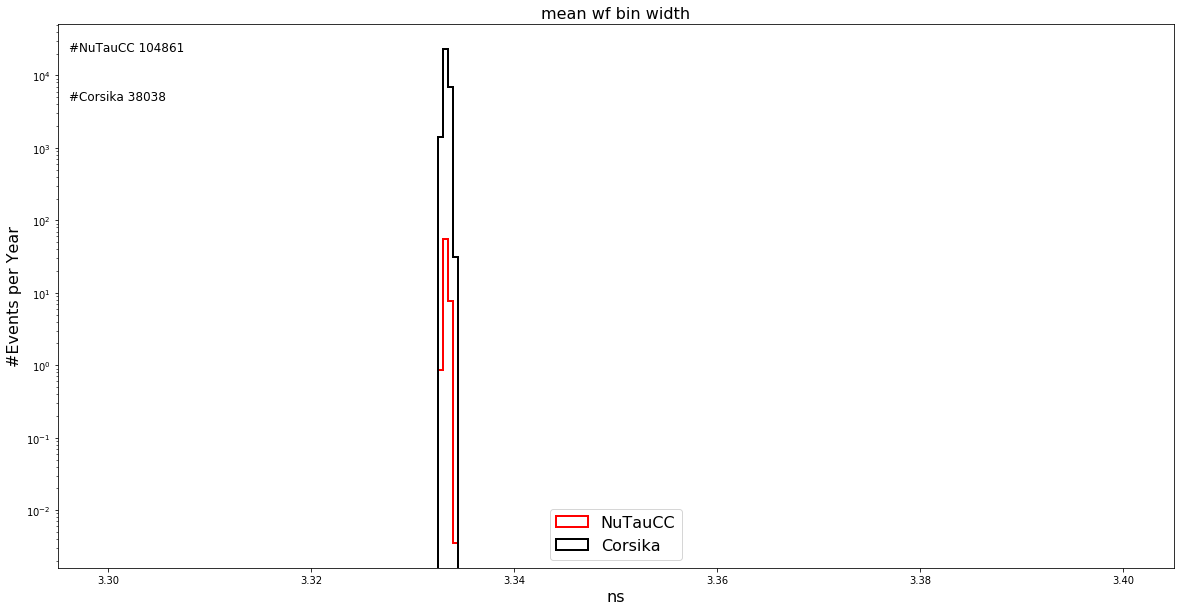

In [7]:
#PlotW2("first wf start mc", "time", data_t['wf_time'], data_c['wf_time'], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[9800,10000], loc =8)
PlotW2("mean wf bin width", "ns", data_t['wf_width'], data_c['wf_width'], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[3.3,3.4], loc =8)


In [8]:
GetRatesM("Rates after NET1 and NET3 and LLH cut",0.99,0.8,"n1","n4","more","more",maskl_t,maskl_c)

corsika events  (105,)
Rates after NET1 and NET3 and LLH cut
NuTauCC = 0.879 +/- 0.017
Corsika =   16.304 +/- 9.354


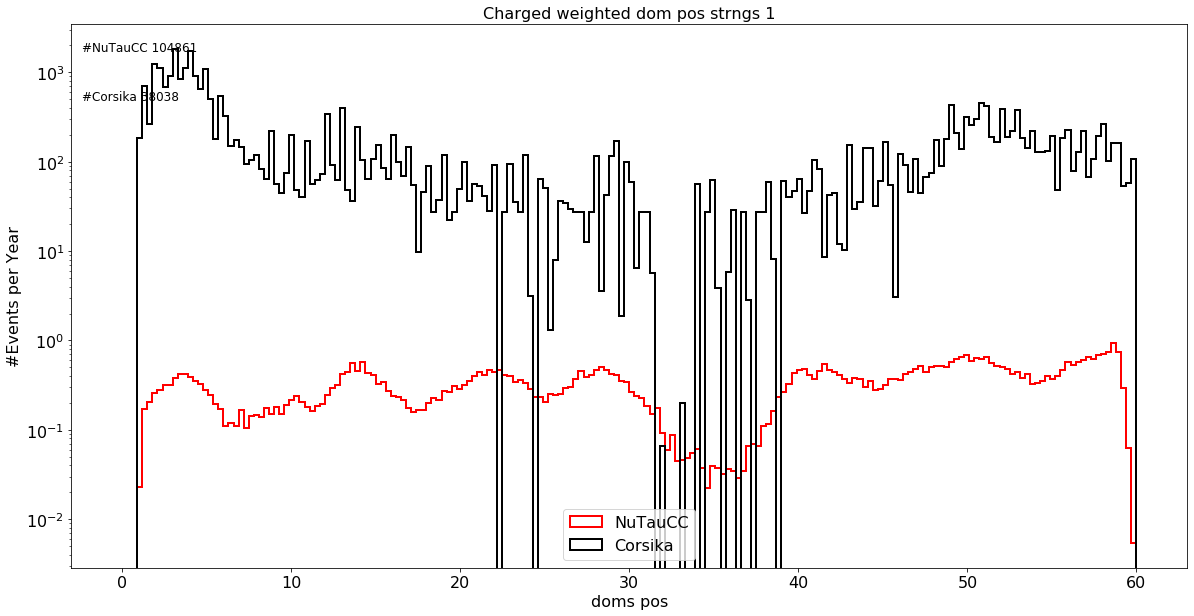

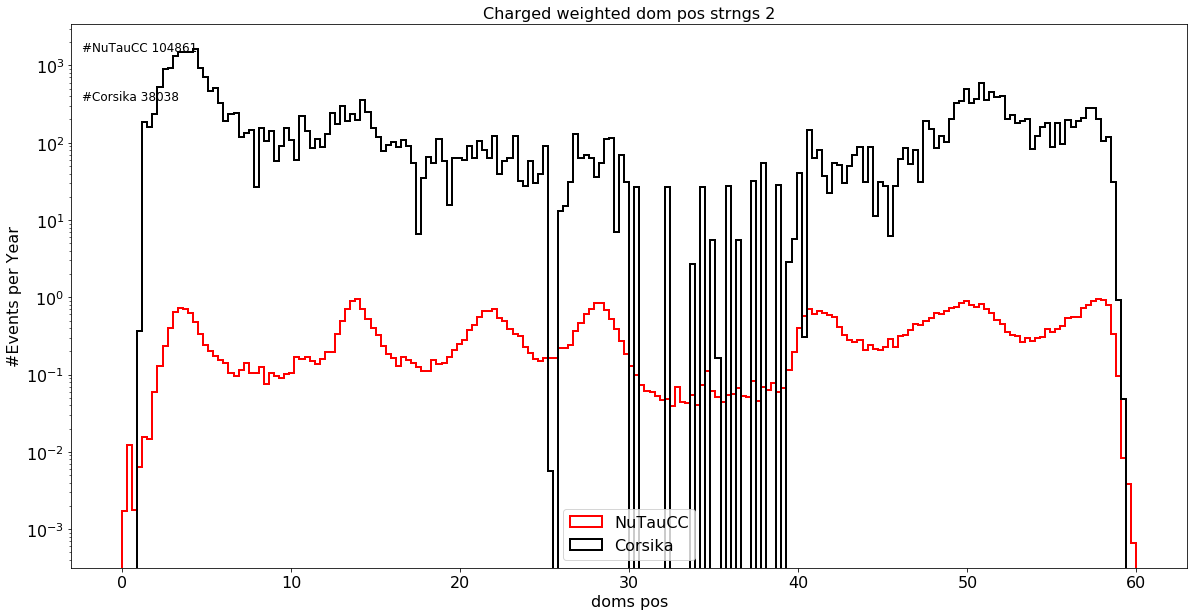

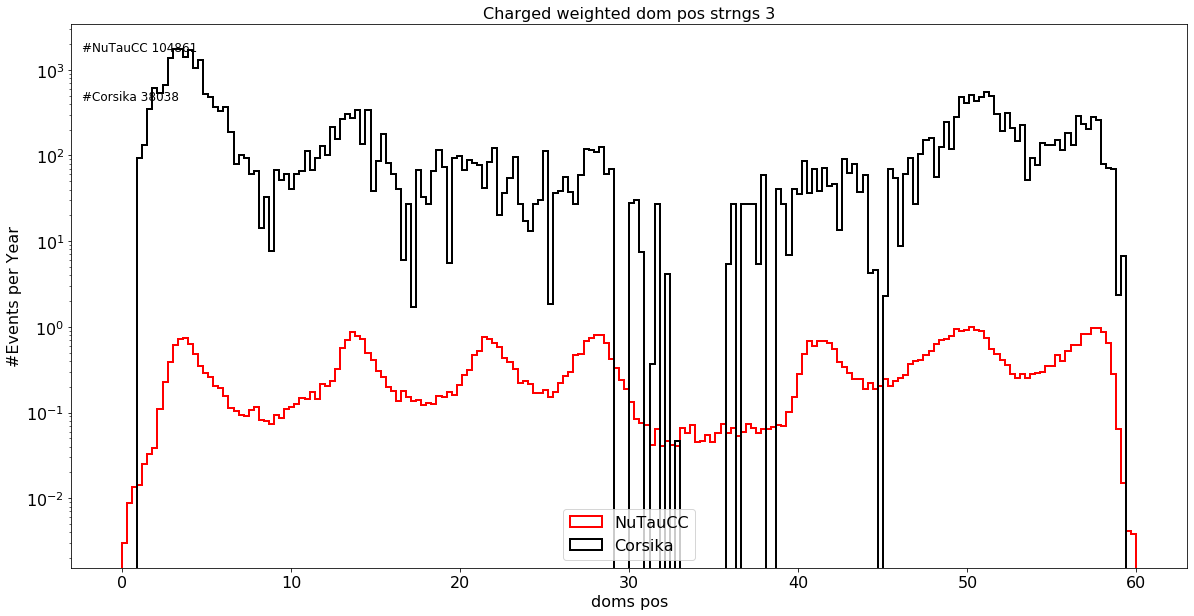

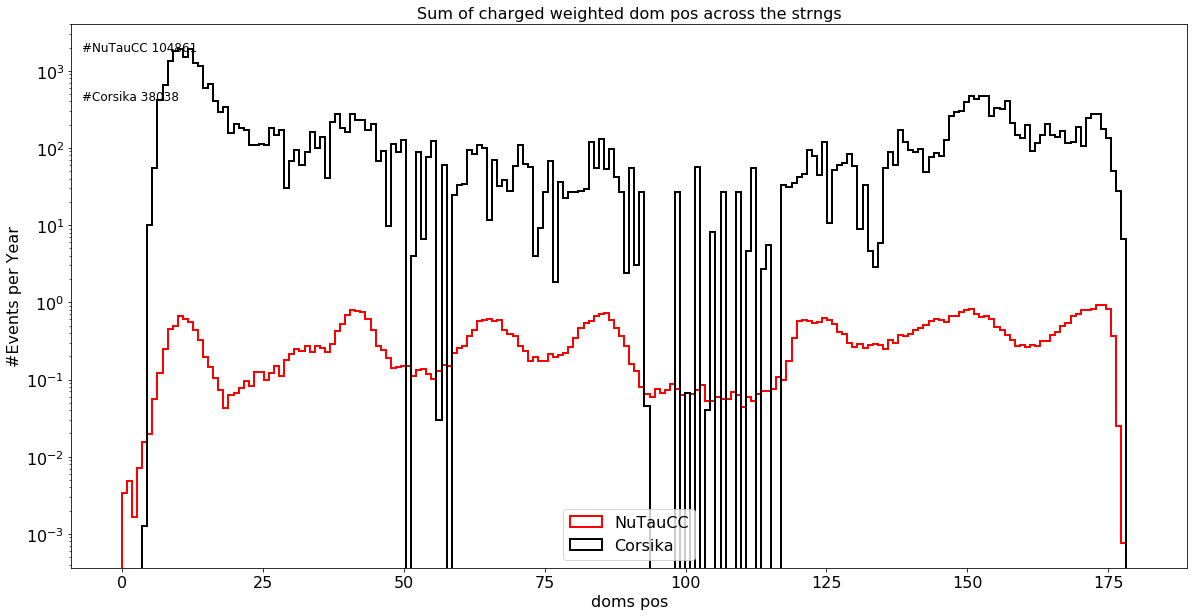

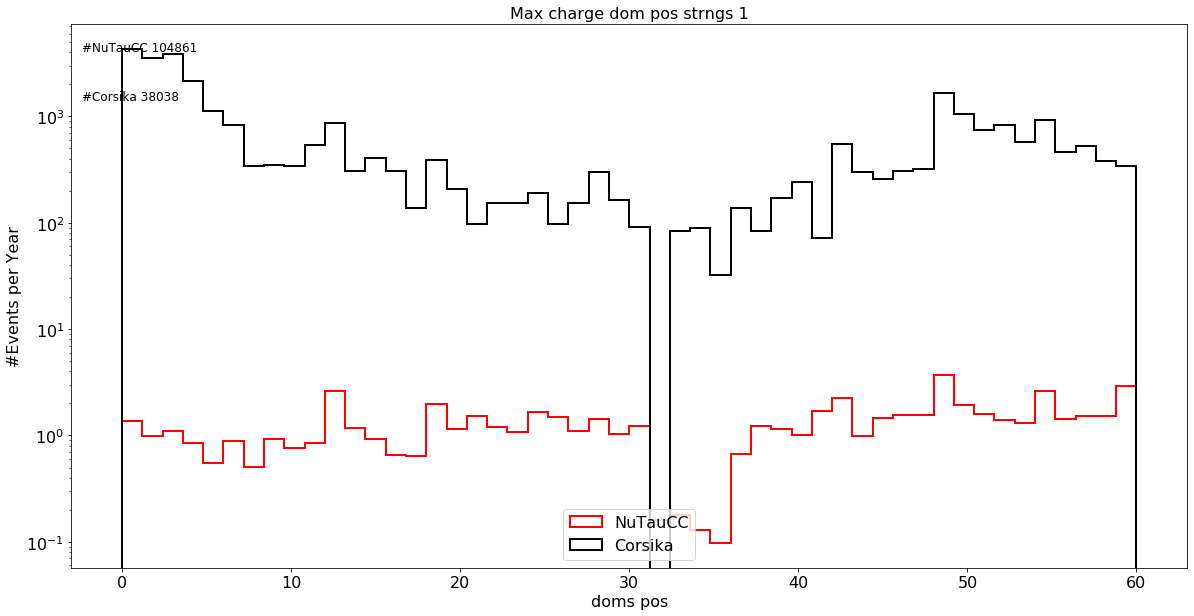

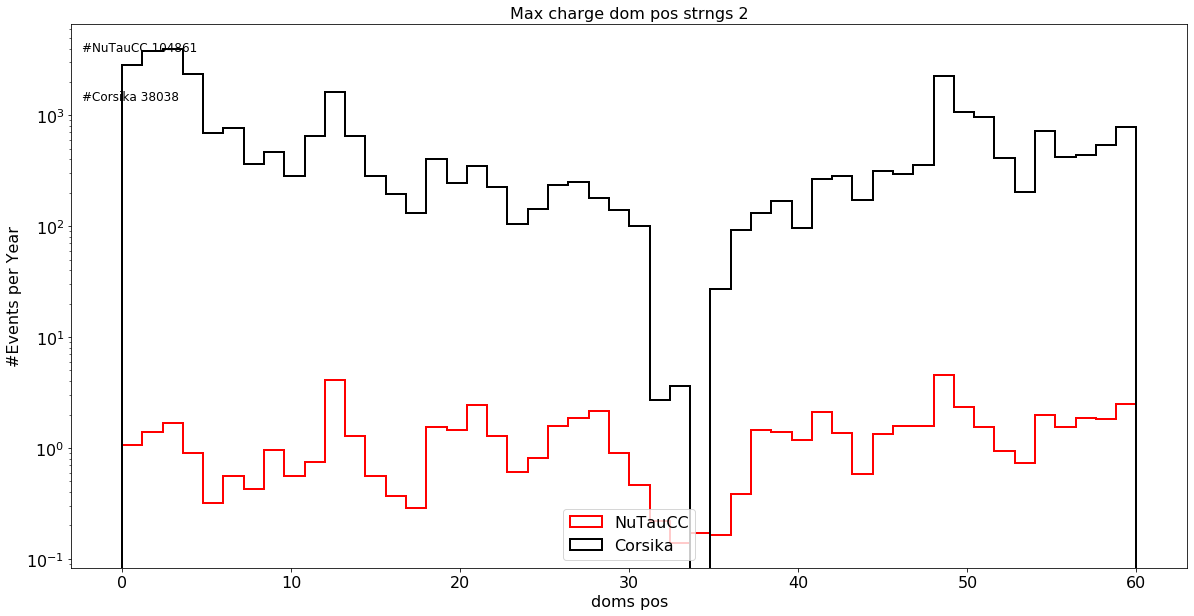

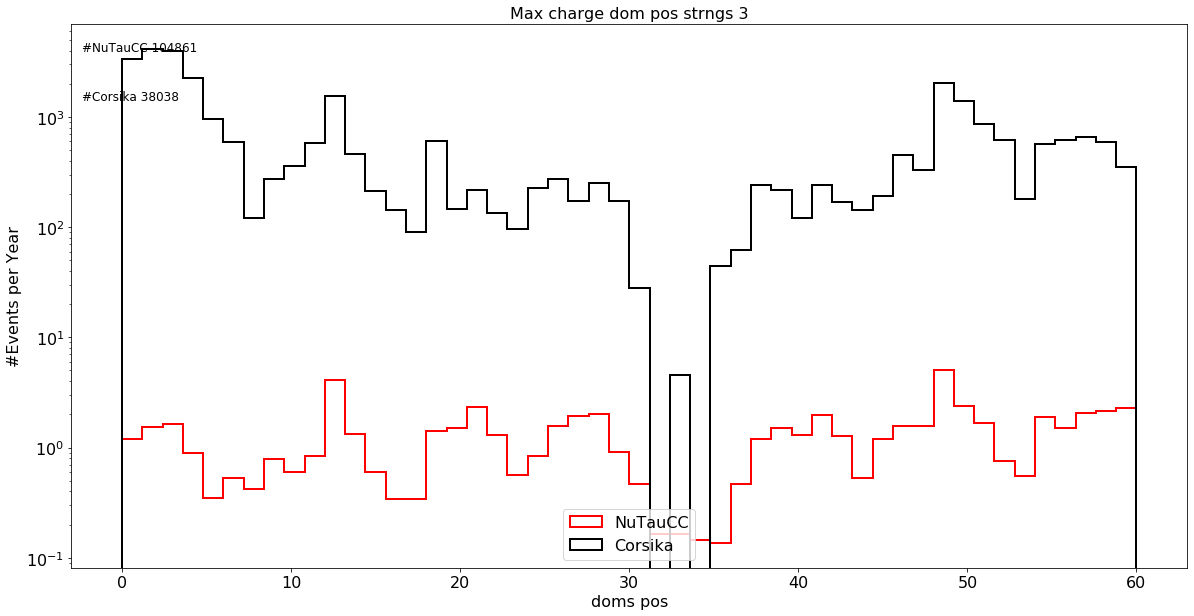

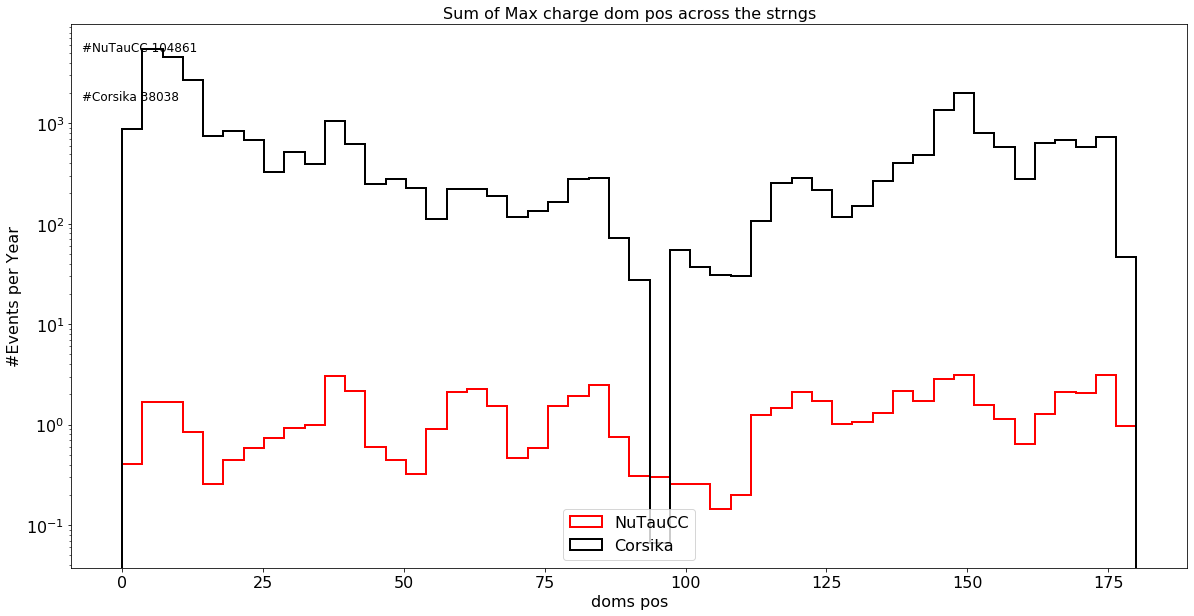

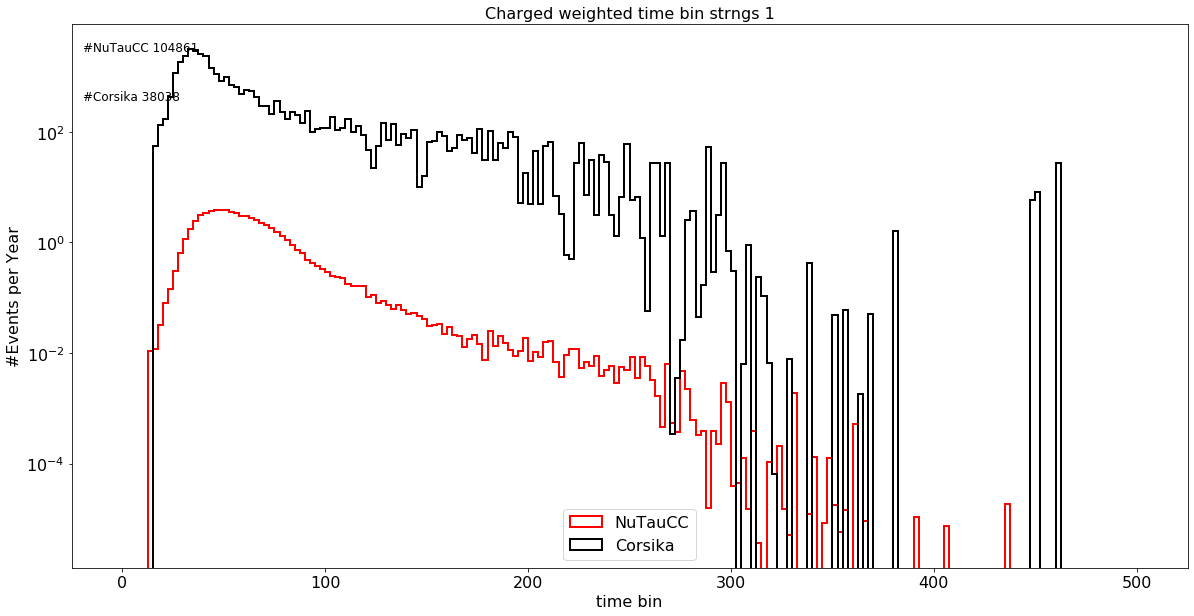

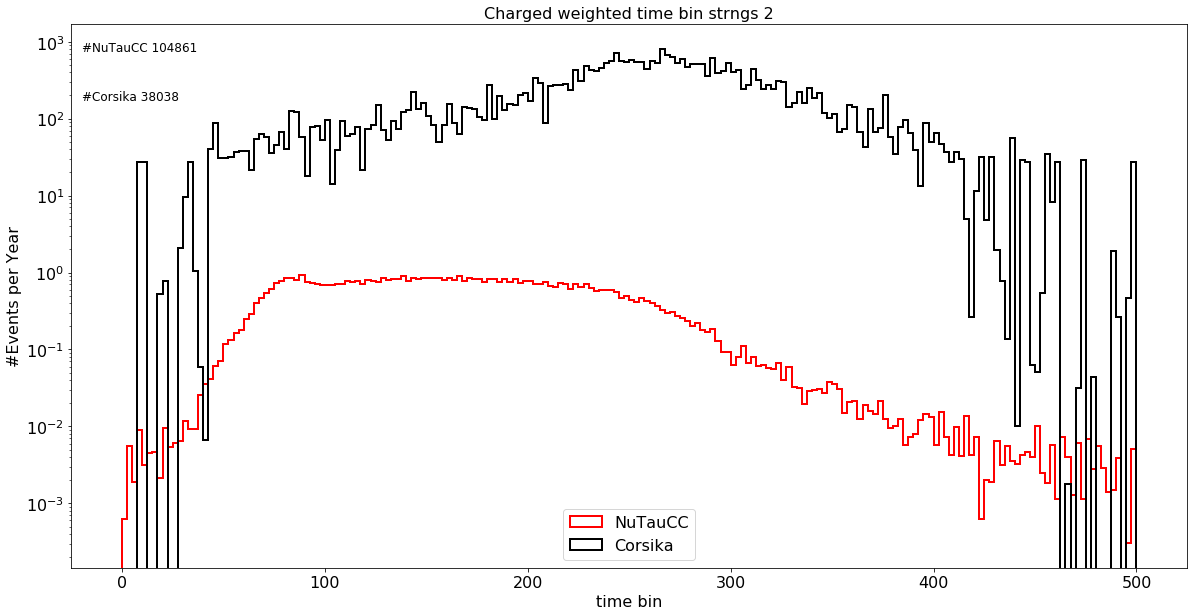

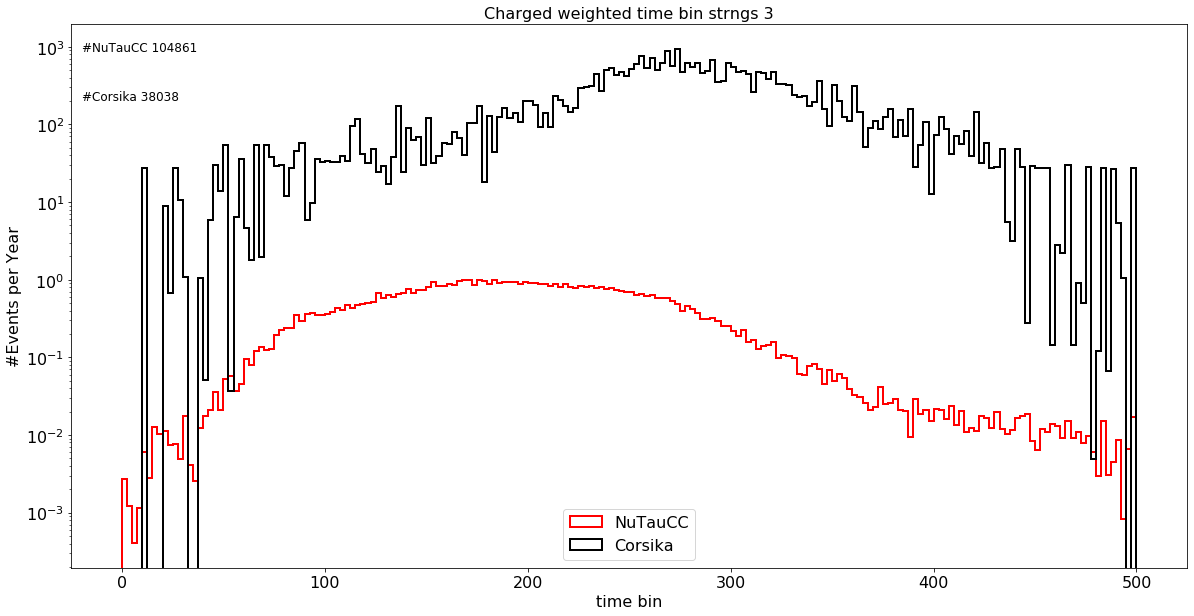

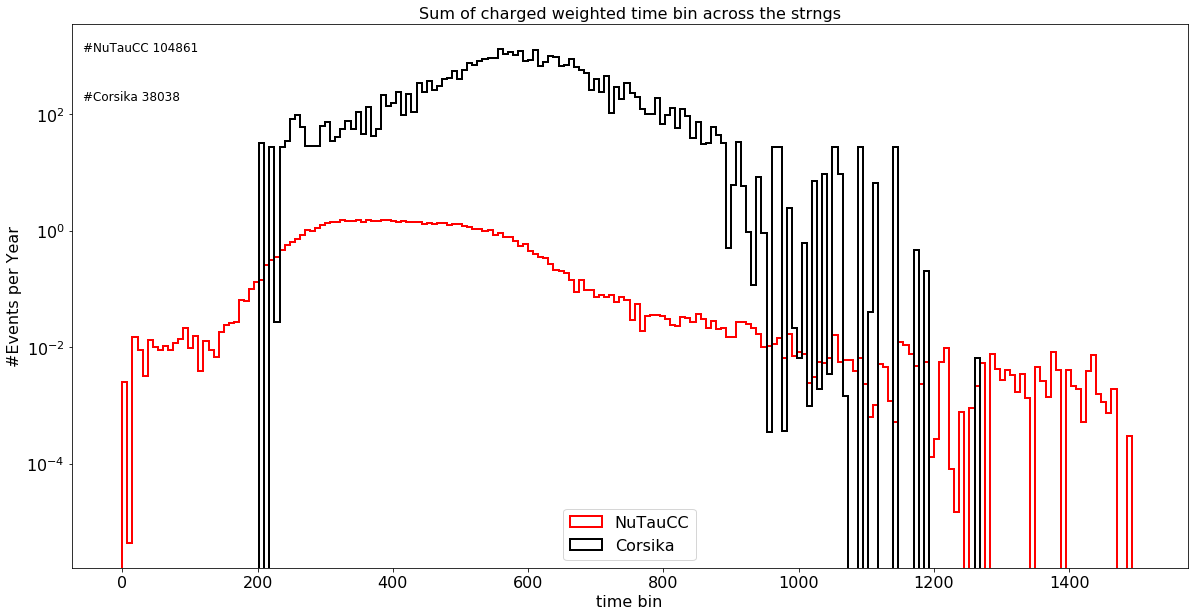

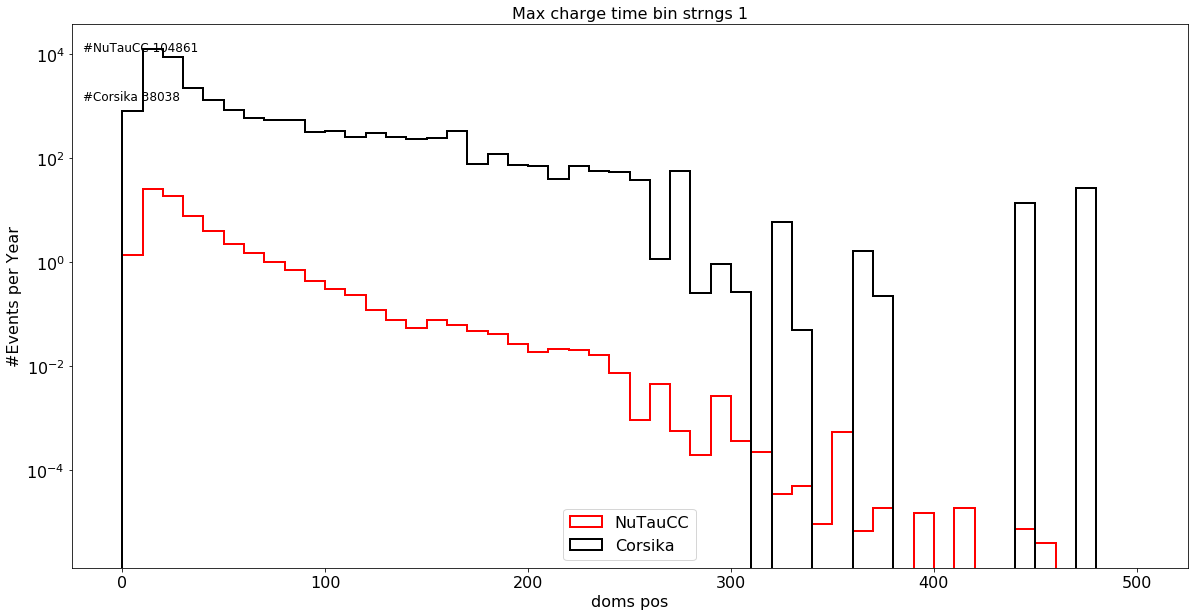

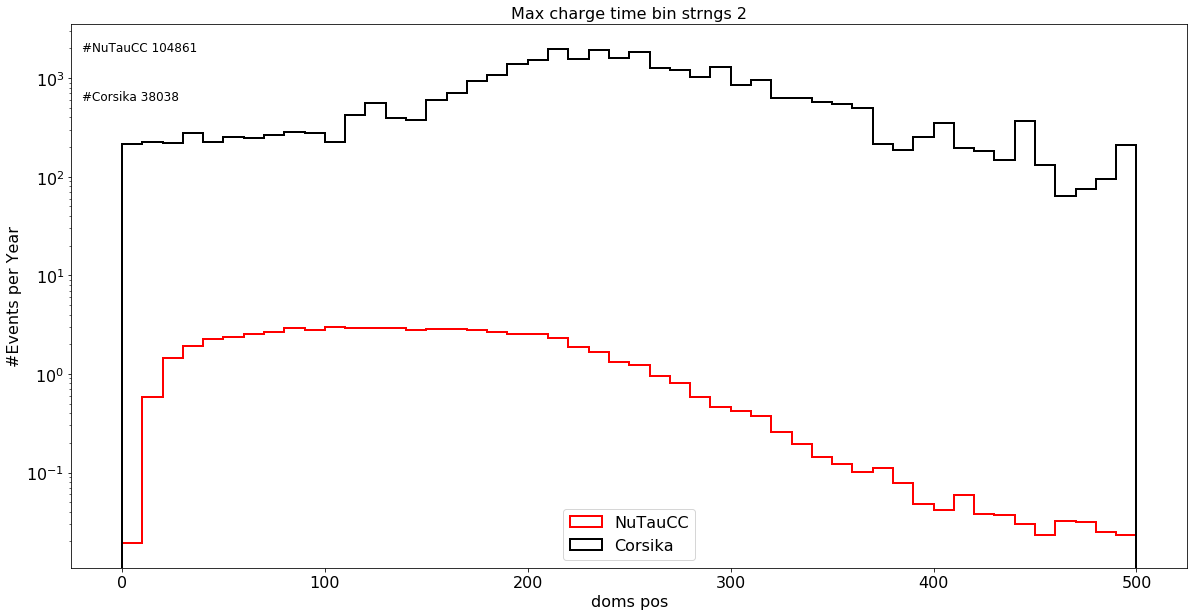

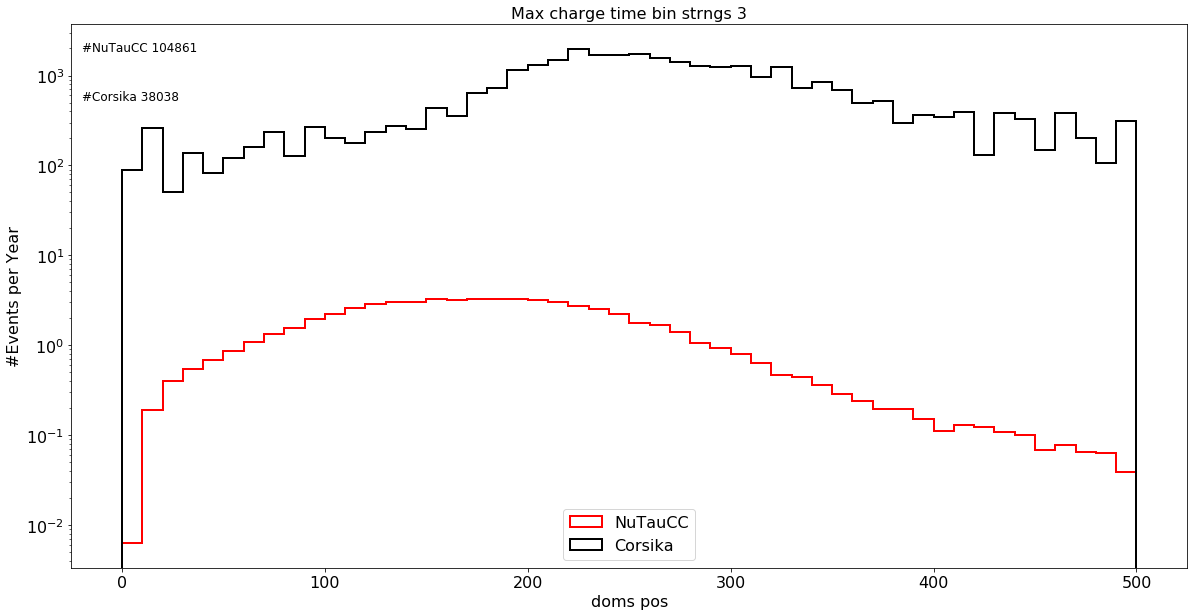

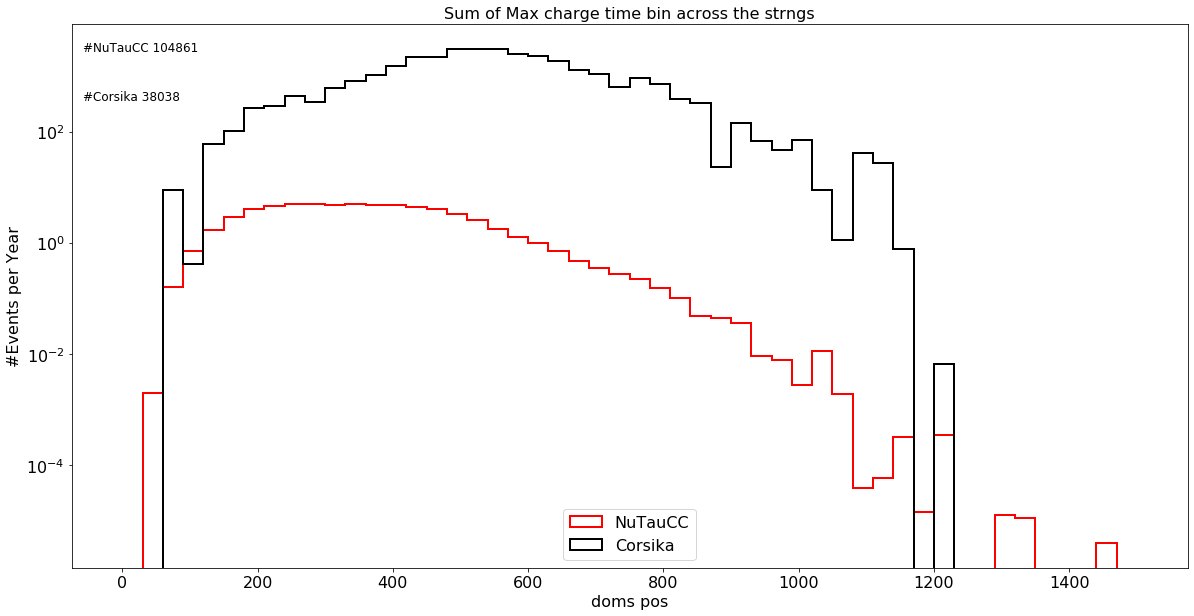

In [9]:
cw_dom_s_c = [np.sum(i) for i in data_c['cw_dom']]
cw_dom_s_t = [np.sum(i) for i in data_t['cw_dom']]
max_dom_s_c = [np.sum(i) for i in data_c['max_dom']]
max_dom_s_t = [np.sum(i) for i in data_t['max_dom']]
cw_time_s_c = [np.sum(i) for i in data_c['cw_time']]
cw_time_s_t = [np.sum(i) for i in data_t['cw_time']]
max_time_s_c = [np.sum(i) for i in data_c['max_time']]
max_time_s_t = [np.sum(i) for i in data_t['max_time']]
PlotW2("Charged weighted dom pos strngs 1", "doms pos", data_t['cw_dom'][:,0], data_c['cw_dom'][:,0], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[0,60], loc =8)
PlotW2("Charged weighted dom pos strngs 2", "doms pos", data_t['cw_dom'][:,1], data_c['cw_dom'][:,1], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[0,60], loc =8)
PlotW2("Charged weighted dom pos strngs 3", "doms pos", data_t['cw_dom'][:,2], data_c['cw_dom'][:,2], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[0,60], loc =8)
PlotW2("Sum of charged weighted dom pos across the strngs", "doms pos",cw_dom_s_t, cw_dom_s_c, data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[0,180], loc =8)

PlotW2("Max charge dom pos strngs 1", "doms pos", data_t['max_dom'][:,0], data_c['max_dom'][:,0], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =50,r =[0,60], loc =8)
PlotW2("Max charge dom pos strngs 2", "doms pos", data_t['max_dom'][:,1], data_c['max_dom'][:,1], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =50,r =[0,60], loc =8)
PlotW2("Max charge dom pos strngs 3", "doms pos", data_t['max_dom'][:,2], data_c['max_dom'][:,2], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =50,r =[0,60], loc =8)
PlotW2("Sum of Max charge dom pos across the strngs", "doms pos",max_dom_s_t, max_dom_s_c, data_t['weight_val'], data_c['weight_val'], xscale='linear',b =50,r =[0,180], loc =8)

PlotW2("Charged weighted time bin strngs 1", "time bin", data_t['cw_time'][:,0], data_c['cw_time'][:,0], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[0,500], loc =8)
PlotW2("Charged weighted time bin strngs 2", "time bin", data_t['cw_time'][:,1], data_c['cw_time'][:,1], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[0,500], loc =8)
PlotW2("Charged weighted time bin strngs 3", "time bin", data_t['cw_time'][:,2], data_c['cw_time'][:,2], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[0,500], loc =8)
PlotW2("Sum of charged weighted time bin across the strngs", "time bin",cw_time_s_t, cw_time_s_c, data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[0,1500], loc =8)

PlotW2("Max charge time bin strngs 1", "doms pos", data_t['max_time'][:,0], data_c['max_time'][:,0], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =50,r =[0,500], loc =8)
PlotW2("Max charge time bin strngs 2", "doms pos", data_t['max_time'][:,1], data_c['max_time'][:,1], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =50,r =[0,500], loc =8)
PlotW2("Max charge time bin strngs 3", "doms pos", data_t['max_time'][:,2], data_c['max_time'][:,2], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =50,r =[0,500], loc =8)
PlotW2("Sum of Max charge time bin across the strngs", "doms pos",max_time_s_t, max_time_s_c, data_t['weight_val'], data_c['weight_val'], xscale='linear',b =50,r =[0,1500], loc =8)

In [39]:
import json
def op(name):
    with open(name, 'r') as fp:
        data = json.load(fp)
        return data
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)

In [128]:
dom_dict = op("/home/dup193/work/double_pulse/dom_position.json") 
str_dict = op("/home/dup193/work/double_pulse/string_position.json")

In [69]:
c = 0.299792/1.33
def calc_res(data, pos_type,time_type):
    res = []
    for i in data:
        st1_mintime = np.min(i['wf_times'][:,0][i['wf_times'][:,0]>0])
        st2_mintime = np.min(i['wf_times'][:,1][i['wf_times'][:,1]>0])
        st3_mintime = np.min(i['wf_times'][:,2][i['wf_times'][:,2]>0])
        st1_mintime_idx =np.where(i['wf_times'][:,0]==st1_mintime)[0][0]
        st2_mintime_idx =np.where(i['wf_times'][:,1]==st2_mintime)[0][0]
        st3_mintime_idx =np.where(i['wf_times'][:,2]==st3_mintime)[0][0]
        dom1_pos = i['wf_pos'][:,st1_mintime_idx,0]
        dom2_pos = i['wf_pos'][:,st2_mintime_idx,1]
        dom3_pos = i['wf_pos'][:,st3_mintime_idx,2]
        d1 = dist(i['cscd_reco']['position'],dom1_pos)
        d2 = dist(i['cscd_reco']['position'],dom2_pos)
        d3 = dist(i['cscd_reco']['position'],dom3_pos)
        t1 = (st1_mintime-i['cscd_reco']['time'])
        t2 = (st2_mintime-i['cscd_reco']['time'])
        t3 = (st3_mintime-i['cscd_reco']['time'])
        res.append([t1-d1/c,t2-d2/c,t3-d3/c])
    res = np.array(res)
    #print(res)
    return res

In [70]:
res_t = calc_res(data_t,"max_dom","max_time")
res_c = calc_res(data_c,"max_dom","max_time")

In [71]:
print(res_t)

[[ -35.45202387  132.48377202  152.35936809]
 [ -49.74162291 -262.91052844 -155.50665813]
 [ -34.49796129  134.61996863  165.13999258]
 ...
 [ 198.71502051  169.23380286  172.02766183]
 [-176.54991999  -55.9256068    88.37697757]
 [  19.01635773   34.61428291   56.45266797]]


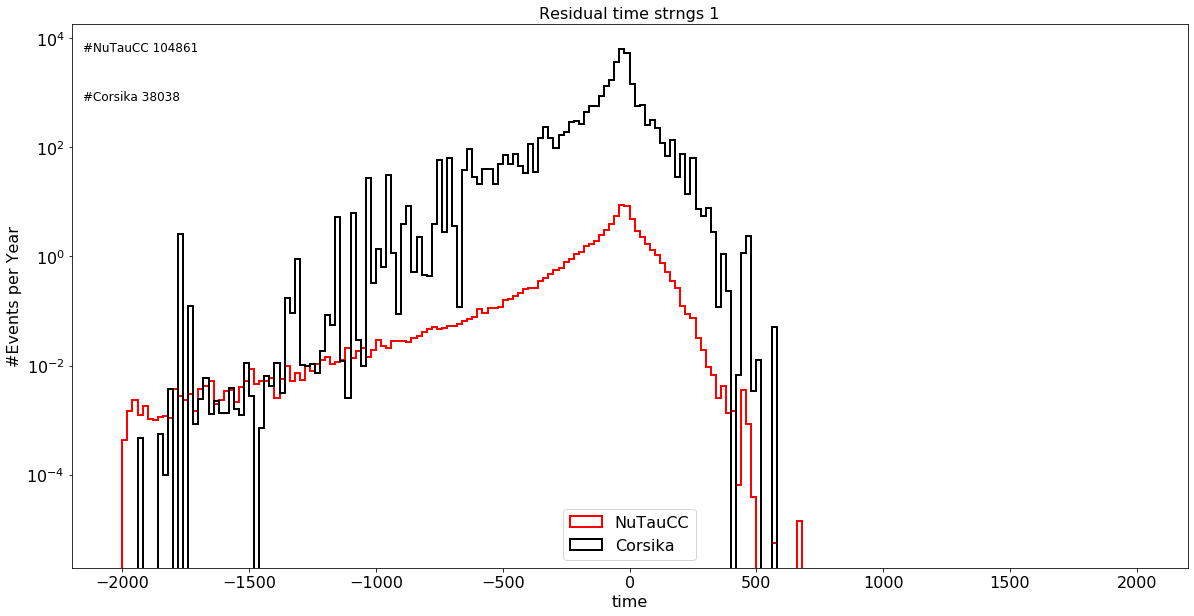

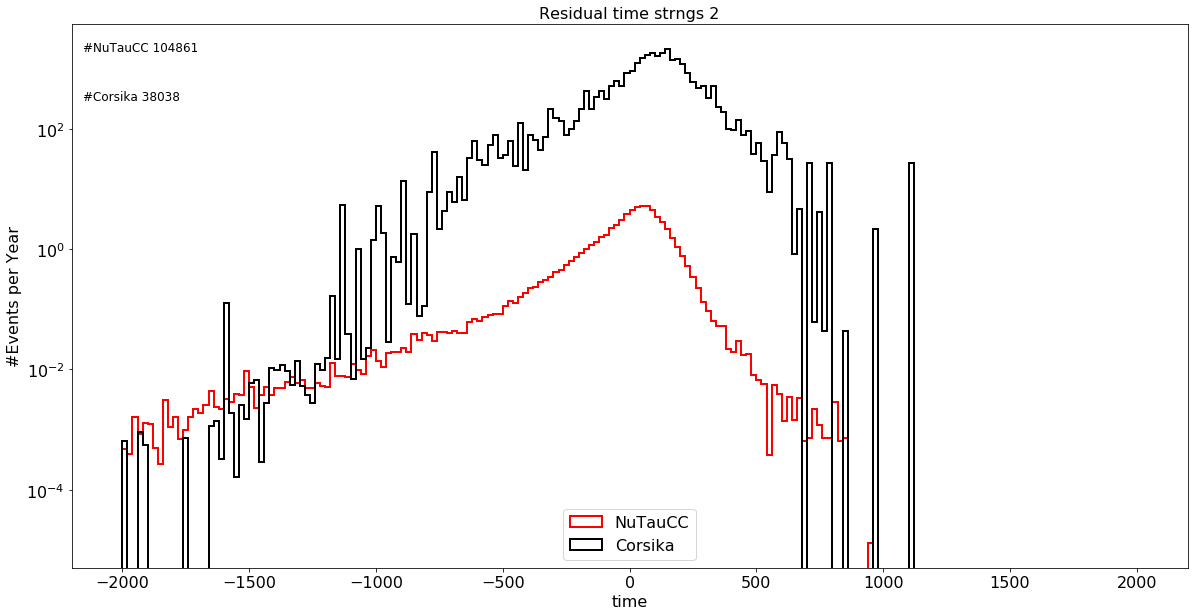

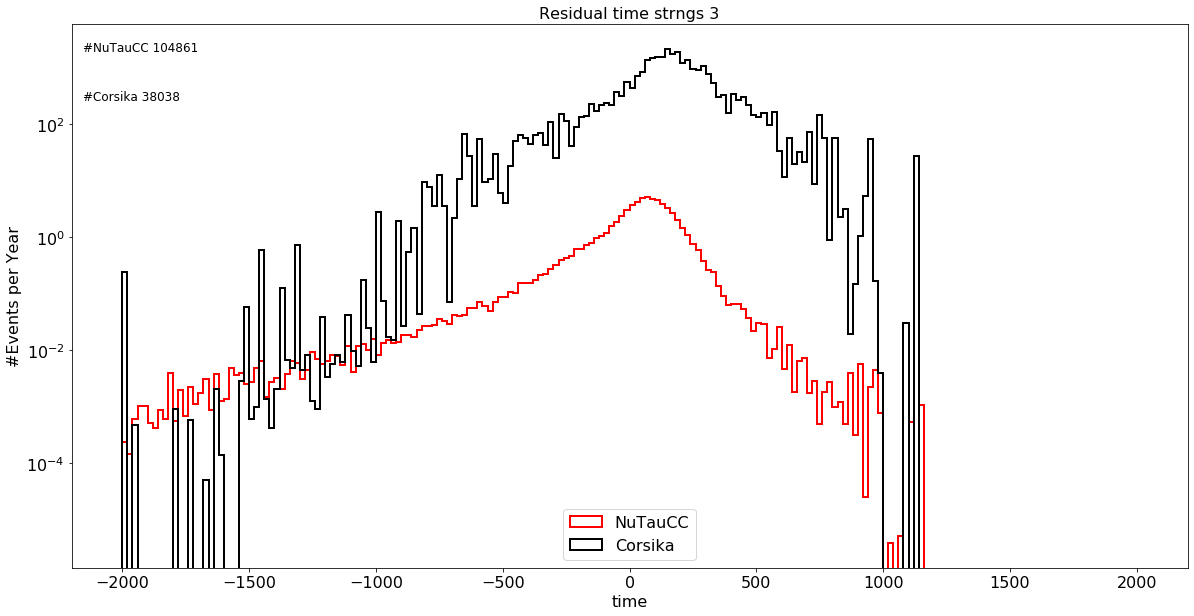

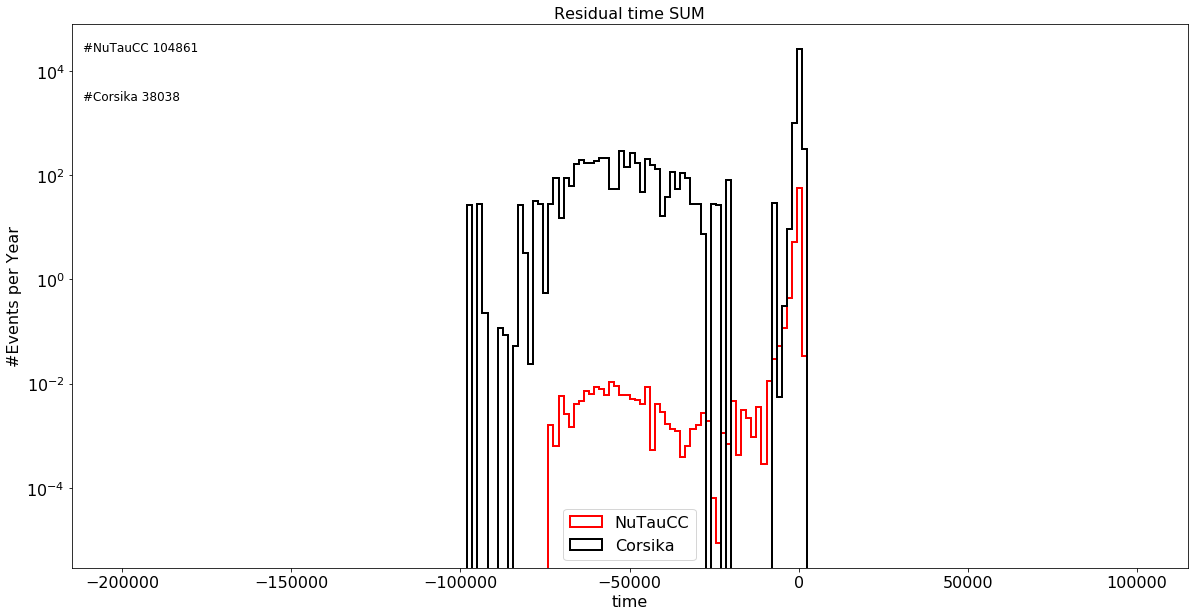

In [81]:
PlotW2("Residual time strngs 1", "time", res_t[:,0], res_c[:,0], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[-2000,2000], loc =8)
PlotW2("Residual time strngs 2", "time", res_t[:,1], res_c[:,1], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[-2000,2000], loc =8)
PlotW2("Residual time strngs 3", "time", res_t[:,2], res_c[:,2], data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[-2000,2000], loc =8)
PlotW2("Residual time SUM", "time", np.sum(res_t,axis = 1),np.sum(res_c,axis = 1), data_t['weight_val'], data_c['weight_val'], xscale='linear',b =200,r =[-200000,100000], loc =8)


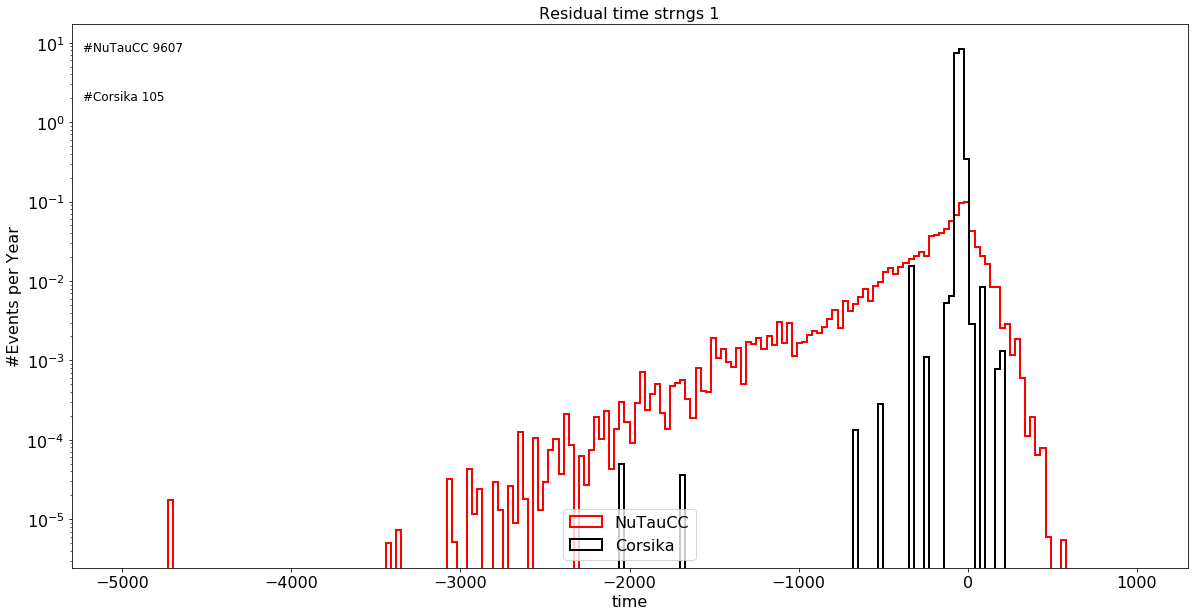

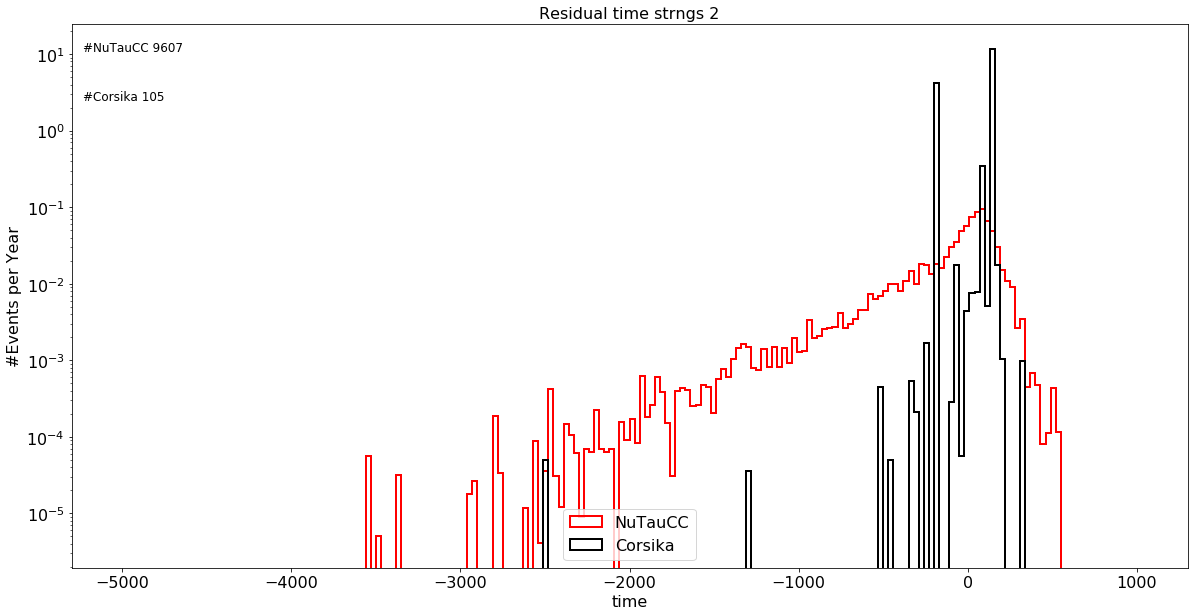

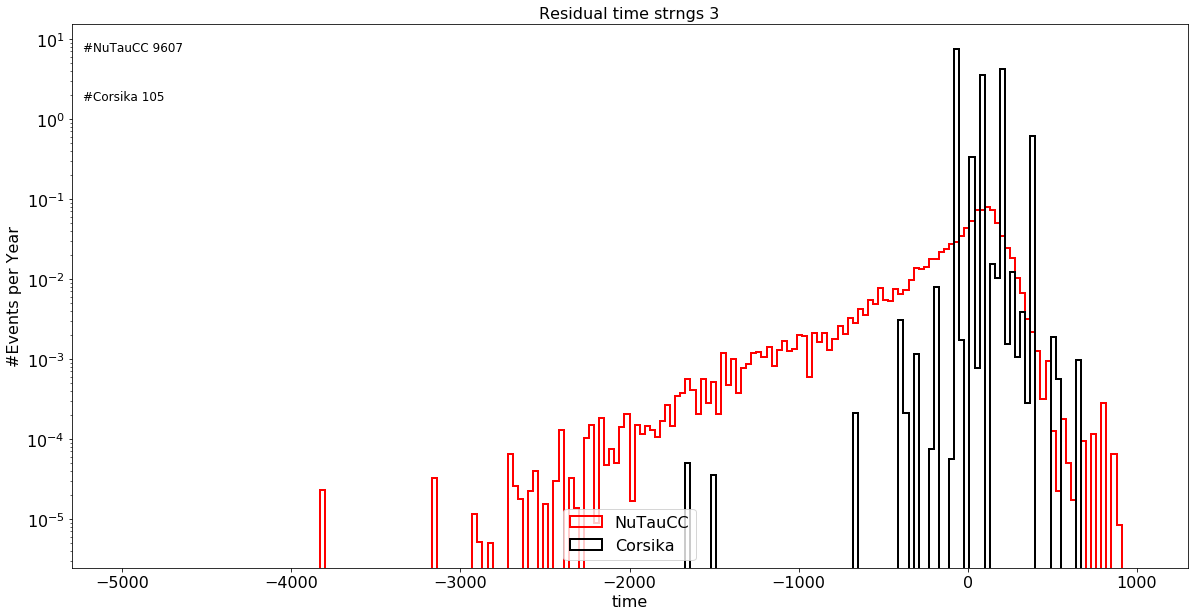

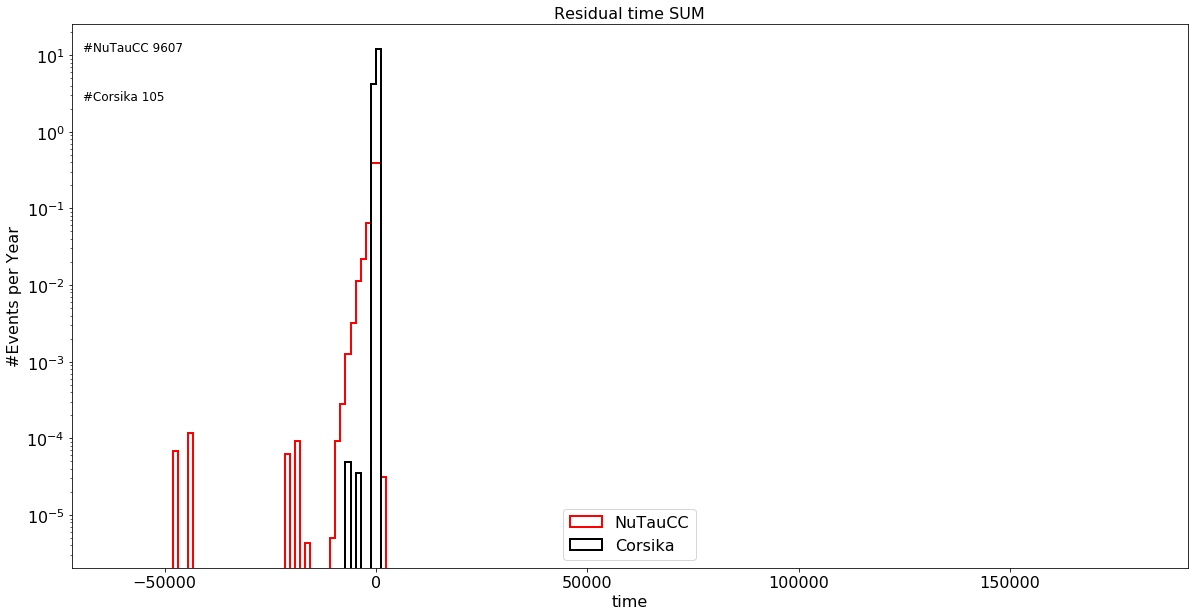

In [83]:
PlotW2("Residual time strngs 1", "time", res_t[:,0][masks_t], res_c[:,0][masks_c], data_t['weight_val'][masks_t], data_c['weight_val'][masks_c], xscale='linear',b =200,r =[-5000,1000], loc =8)
PlotW2("Residual time strngs 2", "time", res_t[:,1][masks_t], res_c[:,1][masks_c], data_t['weight_val'][masks_t], data_c['weight_val'][masks_c], xscale='linear',b =200,r =[-5000,1000], loc =8)
PlotW2("Residual time strngs 3", "time", res_t[:,2][masks_t], res_c[:,2][masks_c], data_t['weight_val'][masks_t], data_c['weight_val'][masks_c], xscale='linear',b =200,r =[-5000,1000], loc =8)
PlotW2("Residual time SUM", "time", np.sum(res_t[masks_t],axis = 1),np.sum(res_c[masks_c],axis = 1), data_t['weight_val'][masks_t], data_c['weight_val'][masks_c], xscale='linear',b =200,r =[-60000,180000], loc =8)


In [134]:
maskc_t = (np.sum(res_t,axis = 1) < 55000) & (np.sum(res_t,axis = 1) > -25000)
maskc_c = (np.sum(res_c,axis = 1) < 55000) & (np.sum(res_c,axis = 1) > -25000)
GetRatesM("Rates after NET1 and NET3 and LLH and Causality cut",0.99,0.8,"n1","n4","more","more",maskc_t,maskc_c)

corsika events  (104,)
Rates after NET1 and NET3 and LLH and Causality cut
NuTauCC = 0.879 +/- 0.017
Corsika =   16.302 +/- 9.354
